# Задачи к Лекции 2

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [1]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
df = df.sort_values('id')
df = df.dropna(subset=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']).sort_values('id')
#df.head()
df.agg(['max', 'min'])

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
max,23713,2,250,200.0,16020,11000,3,3,1,1,1,1
min,10798,1,55,10.0,-150,-70,1,1,0,0,0,0


## Задачи

**1. Построить наивный байесовский классификатор для количественных полей age, height, weight, ap_hi, ap_lo. Исправить данные, если это необходимо. Привести матрицу неточностей и сравнить со значением полученным в ходе лекции. Попытаться объяснить разницу.**

67498 0.7051764496725829


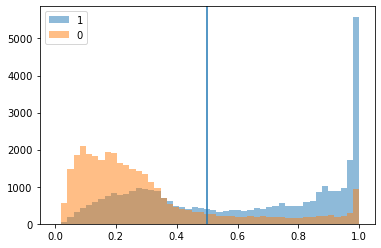

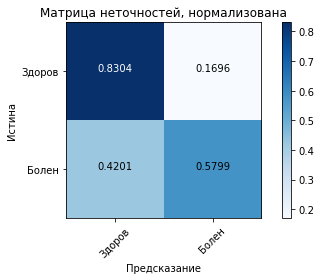

In [2]:
gnb = GaussianNB()
#df.agg(['max', 'min'])
data = df[(df["ap_hi"] >= 100) &
          (df["ap_hi"] <= 200) &
          (df["ap_lo"] >= 50) & 
          (df["ap_lo"] <= 150) &
          (df["weight"] >= 40)
         ].dropna(subset=['age', 'height', 'weight', 'ap_hi', 'ap_lo'])
#data.agg(['max', 'min'])
#data[data["cardio"] == 1][["age","height","weight", "ap_hi", "ap_lo"]].hist(bins=50)
#plt.tight_layout()
train = data[["age", "height", "weight", "ap_hi", "ap_lo"]]#,"cholesterol","gluc","smoke","alco","active"]]
target = data["cardio"]

model = gnb.fit(train, target)
predict_num = model.predict(train)
print(data.shape[0],
     (target == predict_num).sum() / data.shape[0])

predict_num
#print (predict_num)
model.predict(train[1:2]), model.predict_proba(train[1:2])

prob = model.predict_proba(train)[:,1]

plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

cnf_matrix = confusion_matrix(target, predict_num)

class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**2. Написать свой наивный байесовский классификатор для категориальных полей cholesterol, gluc. Привести матрицу неточностей и сравнить со значениями из задачи 1 (нельзя использовать готовое решение из sklearn) (не обязательно)**

67498 0.5897804379389019


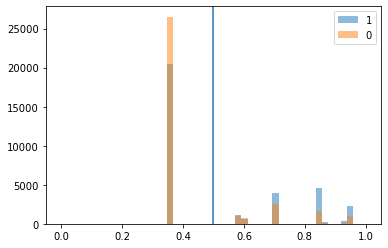

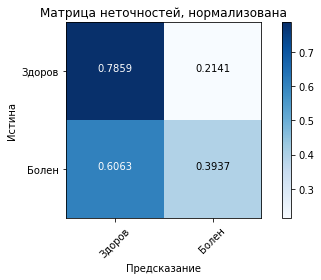

In [3]:
data = df[(df["ap_hi"] >= 100) &
          (df["ap_hi"] <= 200) &
          (df["ap_lo"] >= 50) & 
          (df["ap_lo"] <= 150) &
          (df["weight"] >= 40)
         ].dropna(subset=['cholesterol', 'gluc'])


train = data[['cholesterol', 'gluc']]
target = data["cardio"]

onehot = pd.DataFrame()

for column in train.columns:
    for value in train[column].unique():
        onehot[column + str(value)] = train[column] == value
        
bnb = BernoulliNB()
bnb.fit(onehot, target)
predict_cat = bnb.predict(onehot)
print(data.shape[0],
     (target == predict_cat).sum() / data.shape[0]) 
#print(predict_cat)

prob = bnb.predict_proba(onehot)[:,1]

plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

cnf_matrix = confusion_matrix(target, predict_cat)

class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()


**Комментарии:** Ваши комментарии здесь.

**3. Построить наивный байесовский классификатор для бинарных полей gender, smoke, alco, active. Привести матрицу неточностей и сравнить с предыдущими значениями.**

67498 0.514548579217162


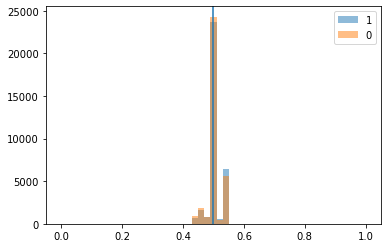

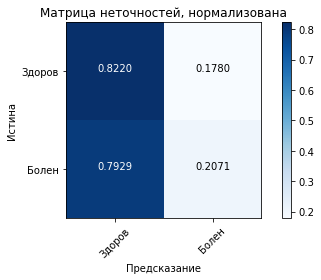

In [4]:
data = df[(df["ap_hi"] >= 100) &
          (df["ap_hi"] <= 200) &
          (df["ap_lo"] >= 50) & 
          (df["ap_lo"] <= 150) &
          (df["weight"] >= 40)
         ].dropna(subset=['gender', 'smoke', 'alco', 'active'])

bnb = BernoulliNB()

train = data[[ 'gender', 'smoke', 'alco', 'active']]
target = data['cardio']

bnb = BernoulliNB()
bnb.fit(train, target)
predict_bin = bnb.predict(train)
print(data.shape[0],
     (target == predict_bin).sum() / data.shape[0]) 
#print(predict_bin)

prob = bnb.predict_proba(train)[:,1]

plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

cnf_matrix = confusion_matrix(target, predict_bin)

class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**4. К этому моменту у вас есть три независимых классификатора: по количественным полям, категориальным и бинарным. Придумать, как их объединить в один единый классификатор, который учитывает все эти поля. Привести матрицу неточностей для него и сравнить с предыдущими значениями. Попытаться объяснить разницу.**

67498 0.6206109810661057


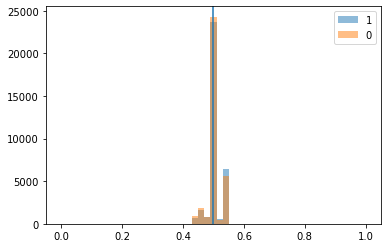

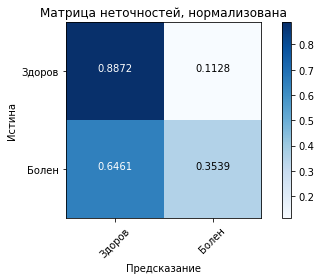

In [5]:
predict_all = ((predict_num + predict_cat + predict_bin)/3).round().astype(int)
predict_all

target = data['cardio']

print(data.shape[0],
     (target == predict_all).sum() / data.shape[0]) 

prob = bnb.predict_proba(train)[:,1]

plt.hist(prob[target == 1], bins=np.linspace(0, 1, 50), alpha=0.5, label="1");
plt.hist(prob[target == 0], bins=np.linspace(0, 1, 50), alpha=0.5, label="0");
plt.axvline(0.5)
plt.legend();

cnf_matrix = confusion_matrix(target, predict_all)

class_names = ["Здоров", "Болен"]
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица неточностей', cmap=plt.cm.Blues):    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.4f' if normalize else 'd'
    thresh = cm.min() + (cm.max() - cm.min()) * 2 / 3.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('Истина')
    plt.xlabel('Предсказание')
    plt.tight_layout()

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,                      
                      title='Матрица неточностей, нормализована')
plt.show()

**Комментарии:** Ваши комментарии здесь.

**5. (Не обязательно) Теперь мы умеем делать классификацию в рамках наивного предположения об независимости всех признаков. Сейчас же нужно попробовать учесть взаимосвязь между признаками через условные вероятности. Построить классификатор с учетом такой связи. Сравнить результат с ранее полученными значениями.**

In [6]:
# A lot of code here

**Комментарии:** Ваши комментарии здесь.